In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 读取数据
hair_dryer=pd.read_csv('Problem_C_Data/hair_dryer.tsv',sep='\t')
microwave=pd.read_csv('Problem_C_Data/microwave.tsv',sep='\t')
pacifier=pd.read_csv('Problem_C_Data/pacifier.tsv',sep='\t')
print("读取数据：hair_dryer:{}, microwave:{}, pacifier: {}".format(hair_dryer.shape[0],microwave.shape[0],pacifier.shape[0]))

# 剔除重复项
hair_dryer = hair_dryer.drop_duplicates()
microwave = microwave.drop_duplicates()
pacifier = pacifier.drop_duplicates()
print("剔除重复项:{}, microwave:{}, pacifier: {}".format(hair_dryer.shape[0],microwave.shape[0],pacifier.shape[0]))

# 剔除缺失值
hair_dryer = hair_dryer.dropna(inplace=False,axis=0)
microwave = microwave.dropna(inplace=False,axis=0)
pacifier = pacifier.dropna(inplace=False,axis=0)
print("剔除缺失值:{}, microwave:{}, pacifier: {}".format(hair_dryer.shape[0],microwave.shape[0],pacifier.shape[0]))

# 保留与商品相关的数据
microwave=microwave[microwave.product_title.str.contains('microwave')]
hair_dryer=hair_dryer[hair_dryer.product_title.str.contains('dryer')]
pacifier=pacifier[pacifier.product_title.str.contains('pacifier')]
print("保留与商品相关的数据：hairdryer:{}, microwave:{}, pacifier: {}".format(hair_dryer.shape[0],microwave.shape[0],pacifier.shape[0]))

读取数据：hair_dryer:11470, microwave:1615, pacifier: 18939
剔除重复项:11470, microwave:1615, pacifier: 18939
剔除缺失值:11468, microwave:1615, pacifier: 18937
保留与商品相关的数据：hairdryer:11103, microwave:1601, pacifier: 11042


In [3]:
# 检查是否有缺失值
pd.isnull(hair_dryer).any()

marketplace          False
customer_id          False
review_id            False
product_id           False
product_parent       False
product_title        False
product_category     False
star_rating          False
helpful_votes        False
total_votes          False
vine                 False
verified_purchase    False
review_headline      False
review_body          False
review_date          False
dtype: bool

In [4]:
import re


def replace_all_blank(value):
    """
  去除value中的所有非字母内容, 包括标点符号、空格、换行、下划线等
  :param value: 需要处理的内容
  :return: 返回处理后的内容
  """
    # \W 表示匹配非数字字母下划线, 将特殊符号替换为空格
    result = re.sub('\W+', ' ', value).replace("_", '')
    return result


def clean_data(dataset):
    # 去除marketplace and product category
    dataset = dataset.drop(['marketplace', 'product_category'], axis=1)

    # 将所有的n/y转换为N/Y
    dataset.loc[dataset["vine"] == "n", 'vine'] = 'N'
    dataset.loc[dataset["vine"] == "y", 'vine'] = 'Y'
    dataset.loc[dataset["verified_purchase"] == "n", 'verified_purchase'] = 'N'
    dataset.loc[dataset["verified_purchase"] == "y", 'verified_purchase'] = 'Y'

    # 剔除字母长度小于4的评论
    dataset = dataset.loc[dataset["review_body"].str.len() > 4]

    # 剔除所有特殊符号,并将所有单词转换为小写
    index = dataset.shape[0]
    dataset_copy = dataset.copy()
    for i in range(index):
        dataset_copy.iloc[i, -3] = replace_all_blank(
            dataset_copy.iloc[i, -3]).lower()
        dataset_copy.iloc[i, -2] = replace_all_blank(
            dataset_copy.iloc[i, -2]).lower()

    # 将时间转换成pandas的Timestamp对象， 添加年月日分组
    dataset_copy['review_date'] = pd.to_datetime(dataset_copy['review_date'])
    dataset_copy['year'] = dataset_copy['review_date'].dt.year
    dataset_copy['month'] = dataset_copy['review_date'].dt.month
    dataset_copy['day'] = dataset_copy['review_date'].dt.day
    # 添加一种投票比率参数
    dataset_copy['helpful_rate'] = dataset_copy[
        'helpful_votes'] / dataset_copy['total_votes']

    # 添加每条评论长度
    dataset_copy['review_length'] = dataset_copy['review_headline'].str.len(
    ) + dataset_copy['review_body'].str.len()

    # 将评论标题和内容进行合并
    dataset_copy['review'] = dataset_copy[
        'review_headline'] + ' ' + dataset_copy['review_body']

    return dataset_copy

In [5]:
hair_dryer = clean_data(hair_dryer)
microwave = clean_data(microwave)
pacifier = clean_data(pacifier)

In [6]:
hair_dryer['stat_rating',helpful_votes]

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,year,month,day,helpful_rate,review_length,review
0,34678741,R9T1FE2ZX2X04,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,5,0,0,N,Y,works great,works great,2015-08-31,2015,8,31,NaN,23,works great works great
1,11599505,RE36JAD5V53PO,B0009XH6V4,670161917,andis micro turbo hair dryer,4,0,0,N,Y,i love travel blow dryers because they are eas...,this dries my hair faster that bigger more pow...,2015-08-31,2015,8,31,NaN,448,i love travel blow dryers because they are eas...
2,2282190,RIDHM8B7SCCV3,B0007NZPY6,16483457,conair pro hair dryer,5,0,1,N,Y,five stars,love this dryer,2015-08-31,2015,8,31,0.000000,26,five stars love this dryer
3,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,253917972,remington silk ceramic professional hair dryer,5,0,0,N,Y,five stars,styling hair in style,2015-08-31,2015,8,31,NaN,31,five stars styling hair in style
4,107098,R35BHQJHXXJD59,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,4,0,0,N,N,i think s great the cord length is perfect,i just got this last week i think s great the ...,2015-08-31,2015,8,31,NaN,111,i think s great the cord length is perfect i j...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11465,35599734,R2O50YNP83CG34,B000065DJY,919751065,revlon 1875w volumizing hair dryer,5,14,18,N,N,great hair,i just purchased this dryer and i really like ...,2002-08-21,2002,8,21,0.777778,245,great hair i just purchased this dryer and i ...
11466,43977044,R2JQPUYU65C4QD,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,1,26,32,N,N,disappointment with dryer,i purchased it because it was supposed to be q...,2002-08-13,2002,8,13,0.812500,555,disappointment with dryer i purchased it becau...
11467,37733836,R3GO6L5PWBS0IW,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,5,4,4,N,Y,the best dryer,i love this dryer not only is it quiet it real...,2002-07-13,2002,7,13,1.000000,475,the best dryer i love this dryer not only is ...
11468,38947355,R3JMGN42OJCL97,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,5,78,87,N,N,excellent for fine limp hair,this hairdryer far exceeded my expection for b...,2002-04-20,2002,4,20,0.896552,731,excellent for fine limp hair this hairdryer fa...


In [8]:
hair_dryer.to_csv('hair_dryer.csv')
microwave.to_csv('microwave.csv')
pacifier.to_csv('pacifier.csv')

# 作图

## Picture 1

In [9]:
hair_dryer = pd.read_csv('hair_dryer.csv')
microwave = pd.read_csv('microwave.csv')
pacifier = pd.read_csv('pacifier.csv')
# 计算每个月的平均评分
start_num_month = pd.concat([
    hair_dryer.groupby(by=['year', 'month'])['star_rating'].mean(),
    microwave.groupby(by=['year', 'month'])['star_rating'].mean(),
    pacifier.groupby(by=['year', 'month'])['star_rating'].mean()
    ],
    axis=1)
start_num_month.columns  = ['Hair dryer','Microwave', 'Pacifier']
# 重置索引
start_num_month = start_num_month.reset_index()
start_num_month['date'] = start_num_month['year'] + start_num_month['month']/12
start_num_month = start_num_month.drop(['year','month'],axis=1).set_index('date')
start_num_month

,Hair dryer,Microwave,Pacifier
date,,,
2002.250000,3.000000,NaN,NaN
2002.333333,5.000000,NaN,NaN
2002.583333,5.000000,NaN,NaN
2002.666667,3.000000,NaN,NaN
2002.916667,4.000000,NaN,NaN
...,...,...,...
2015.333333,4.261398,3.637931,4.349666
2015.416667,4.204403,4.092593,4.387978
2015.500000,4.191617,3.803279,4.413882


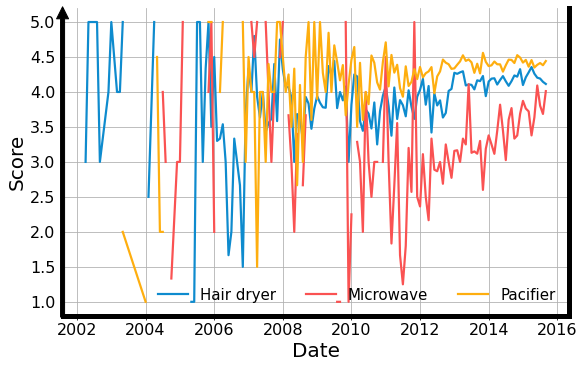

In [10]:
fig, ax = plt.subplots(figsize=(8,5), layout='constrained')

# 去除顶部的坐标轴
ax.spines['top'].set_visible(False)
# 绘制左y轴方向的箭头
ax.annotate('', 
             xy=(0, 1.06), xycoords='axes fraction',
             xytext=(0, -0.06), textcoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05),
             zorder=5)

# 修改坐标轴粗细和字体大小
ax.spines['bottom'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)

ax.tick_params(labelsize=16)
fig1, = ax.plot(start_num_month.iloc[:,0], color='#0E8BCE', lw=2.2,label='Hair dryer')
fig2, = ax.plot(start_num_month.iloc[:,1], color='#FA5252', lw=2.2,label='Microwave')
fig3, = ax.plot(start_num_month.iloc[:,2], color='#FEAE0F', lw=2.2,label='Pacifier')
ax.set_xlabel('Date',fontsize=20)
ax.set_ylabel('Score',fontsize=20)
ax.legend(fontsize=15,frameon=False,ncol=4)
ax.grid()


## Picture 2

In [11]:
hair_dryer = pd.read_csv('hair_dryer.csv')
microwave = pd.read_csv('microwave.csv')
pacifier = pd.read_csv('pacifier.csv')
# 计算每个月的总评论数量
review_num_month = pd.concat([
    hair_dryer.groupby(by=['year', 'month'])['review_length'].count(),
    microwave.groupby(by=['year', 'month'])['review_length'].count(),
    pacifier.groupby(by=['year', 'month'])['review_length'].count()
    ],
    axis=1)
review_num_month.columns  = ['Hair dryer','Microwave', 'Pacifier']
# 重置索引
review_num_month = review_num_month.reset_index()
review_num_month['date'] = review_num_month['year'] + review_num_month['month']/12
review_num_month = review_num_month.drop(['year','month'],axis=1).set_index('date')
review_num_month

,Hair dryer,Microwave,Pacifier
date,,,
2002.250000,1.0,NaN,NaN
2002.333333,1.0,NaN,NaN
2002.583333,1.0,NaN,NaN
2002.666667,2.0,NaN,NaN
2002.916667,1.0,NaN,NaN
...,...,...,...
2015.333333,329.0,58.0,449.0
2015.416667,318.0,54.0,366.0
2015.500000,334.0,61.0,389.0


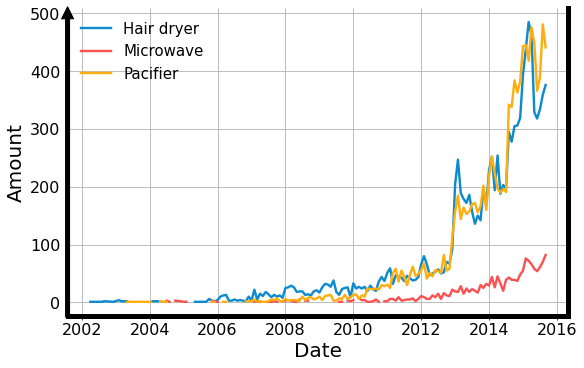

In [12]:
fig, ax = plt.subplots(figsize=(8,5), layout='constrained')

# 去除顶部的坐标轴
ax.spines['top'].set_visible(False)
# 绘制左y轴方向的箭头
ax.annotate('', 
             xy=(0, 1.06), xycoords='axes fraction',
             xytext=(0, -0.06), textcoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05),
             zorder=5)

# 修改坐标轴粗细和字体大小
ax.spines['bottom'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)

ax.tick_params(labelsize=16)
fig1, = ax.plot(review_num_month.iloc[:,0], color='#0E8BCE', lw=2.4,label='Hair dryer')
fig2, = ax.plot(review_num_month.iloc[:,1], color='#FA5252', lw=2.4,label='Microwave')
fig3, = ax.plot(review_num_month.iloc[:,2], color='#FEAE0F', lw=2.4,label='Pacifier')
ax.set_xlabel('Date',fontsize=20)
ax.set_ylabel('Amount',fontsize=20)
ax.legend(fontsize=15,frameon=False,ncol=1)
ax.grid()

## Picture 3

In [13]:
hair_dryer = pd.read_csv('hair_dryer.csv')
microwave = pd.read_csv('microwave.csv')
pacifier = pd.read_csv('pacifier.csv')
# 计算每个月的总评论数量
start_rate_per = pd.concat([
    hair_dryer.groupby(by=['star_rating'])['star_rating'].count()/hair_dryer.shape[0],
    microwave.groupby(by=['star_rating'])['star_rating'].count()/microwave.shape[0],
    pacifier.groupby(by=['star_rating'])['star_rating'].count()/pacifier.shape[0]
    ],
    axis=1)
start_rate_per.columns  = ['Hair dryer','Microwave', 'Pacifier']
# 重置索引
start_rate_per = start_rate_per.reset_index()
start_rate_per = start_rate_per.set_index('star_rating')
start_rate_per

,Hair dryer,Microwave,Pacifier
star_rating,,,
1,0.090044,0.250314,0.051034
2,0.055530,0.070263,0.044782
3,0.086602,0.082183,0.070897
4,0.182897,0.184442,0.127540
5,0.584926,0.412798,0.705747


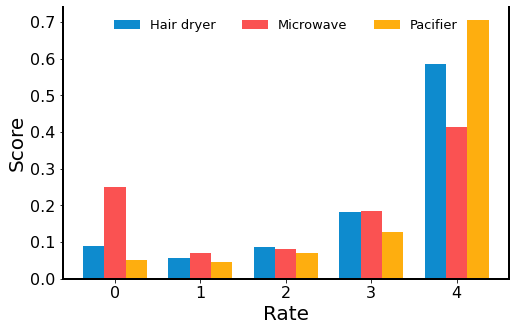

In [14]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.spines['top'].set_visible(False)
# 修改坐标轴粗细和字体大小
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# 构造x轴刻度标签、数据
labels = ['1', '2', '3', '4', '5']

# 三组数据
x = np.arange(len(labels))  # x轴刻度标签位置
width = 0.25  # 柱子的宽度
# 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
# x - width，x， x + width即每组数据在x轴上的位置
ax.bar(x - width,
       start_rate_per.iloc[:, 0],
       width,
       label='Hair dryer',
       color='#0E8BCE')
ax.bar(x, start_rate_per.iloc[:, 1], width, label='Microwave', color='#FA5252')
ax.bar(x + width,
       start_rate_per.iloc[:, 2],
       width,
       label='Pacifier',
       color='#FEAE0F')
# 设置坐标轴标签
ax.set_xlabel('Rate', fontsize=20)
ax.set_ylabel('Score', fontsize=20)
# 设置坐标轴刻度大小
ax.tick_params(labelsize=16)
ax.legend(fontsize=13, loc='upper center', frameon=False, ncol=3)

## Picture 4

In [15]:
hair_dryer = pd.read_csv('hair_dryer.csv')
microwave = pd.read_csv('microwave.csv')
pacifier = pd.read_csv('pacifier.csv')
# 计算每个月的总评论数量
helpful_rating = pd.concat([
    hair_dryer.loc[hair_dryer['total_votes']>10]['helpful_rate'],
    microwave.loc[microwave['total_votes']>10]['helpful_rate'],
    pacifier.loc[pacifier['total_votes']>10]['helpful_rate']
    ],
    axis=1)
helpful_rating.columns  = ['Hair dryer','Microwave', 'Pacifier']
helpful_rating

,Hair dryer,Microwave,Pacifier
32,NaN,0.886792,NaN
34,NaN,NaN,0.818182
38,0.973684,NaN,NaN
75,NaN,0.954545,NaN
76,0.812500,NaN,NaN
...,...,...,...
11032,0.967213,NaN,NaN
11034,0.777778,NaN,NaN
11035,0.812500,NaN,NaN
11037,0.896552,NaN,NaN


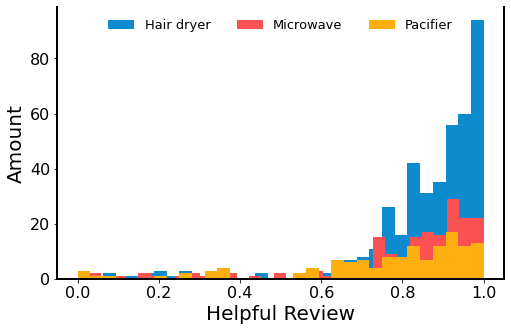

In [16]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.spines['top'].set_visible(False)
# 修改坐标轴粗细和字体大小
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

a, b, c = ax.hist(helpful_rating.iloc[:, 0],
                  bins=32,
                  label='Hair dryer',
                  color='#0E8BCE')
a, b, c = ax.hist(helpful_rating.iloc[:, 1],
                  bins=32,
                  label='Microwave',
                  color='#FA5252')
a, b, c = ax.hist(helpful_rating.iloc[:, 2],
                  bins=32,
                  label='Pacifier',
                  color='#FEAE0F')

# 设置坐标轴标签
ax.set_xlabel('Helpful Review', fontsize=20)
ax.set_ylabel('Amount', fontsize=20)
# 设置坐标轴刻度大小
ax.tick_params(labelsize=16)
ax.legend(fontsize=13, loc='upper center', frameon=False, ncol=3)

## Picture 5

In [108]:
helpful_rating.sort_values(by='review_length')

,helpful_rate,review_length
1960,0.000000,17
9032,0.842105,20
4127,0.727273,40
563,0.027778,42
542,0.166667,44
...,...,...
518,0.947917,5713
7830,0.958333,5844
499,0.959906,6078
589,0.703704,6306


In [109]:
hair_dryer = pd.read_csv('hair_dryer.csv')
microwave = pd.read_csv('microwave.csv')
pacifier = pd.read_csv('pacifier.csv')
# 计算每个月的总评论数量
helpful_rating = pd.concat([
    hair_dryer.loc[hair_dryer['total_votes']>10].loc[:,['helpful_rate','review_length']],
    microwave.loc[microwave['total_votes']>10].loc[:,['helpful_rate','review_length']],
    pacifier.loc[pacifier['total_votes']>10].loc[:,['helpful_rate','review_length']]
    ],
    axis=0)
helpful_rating = helpful_rating.sort_values(by='review_length')
helpful_rating

,helpful_rate,review_length
1960,0.000000,17
9032,0.842105,20
4127,0.727273,40
563,0.027778,42
542,0.166667,44
...,...,...
518,0.947917,5713
7830,0.958333,5844
499,0.959906,6078
589,0.703704,6306


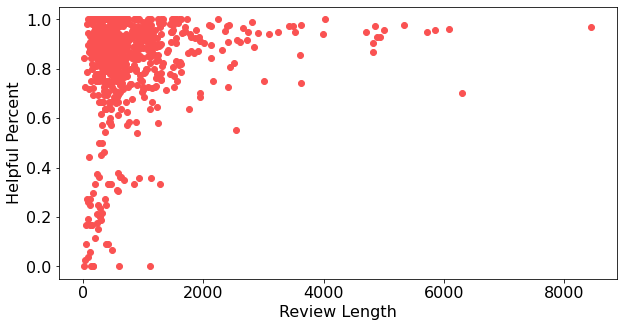

In [156]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(helpful_rating.iloc[:,1], helpful_rating.iloc[:,0],color='#FA5252')
ax.set_xlabel('Review Length', fontsize=16)
ax.set_ylabel('Helpful Percent', fontsize=16)
# 设置坐标轴刻度大小
ax.tick_params(labelsize=16)

# 情感分析

In [73]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
def sentiquantify(sen):
    score = sid.polarity_scores(sen)
    score=score['compound']
    return score

In [80]:
hair_dryer = pd.read_csv('hair_dryer.csv')
microwave = pd.read_csv('microwave.csv')
pacifier = pd.read_csv('pacifier.csv')

In [82]:
hair_dryer['total_sentiscore'] = hair_dryer['review'].apply(sentiquantify)
microwave['total_sentiscore'] = microwave['review'].apply(sentiquantify)
pacifier['total_sentiscore'] = pacifier['review'].apply(sentiquantify)
hair_dryer.to_csv('hair_dryer.csv')
microwave.to_csv('microwave.csv')
pacifier.to_csv('pacifier.csv')

In [183]:
pacifier.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'star_rating', 'helpful_votes',
       'total_votes', 'vine', 'verified_purchase', 'review_headline',
       'review_body', 'review_date', 'year', 'month', 'day', 'helpful_rate',
       'review_length', 'review', 'total_sentiscore'],
      dtype='object')

In [195]:
microwave['star_rating'].count()

1594

In [145]:
x1 = hair_dryer.loc[hair_dryer['total_sentiscore']<0].groupby(by=['star_rating'])['star_rating'].count()
y1 = hair_dryer.loc[hair_dryer['total_sentiscore']>=0].groupby(by=['star_rating'])['star_rating'].count()
x2 = microwave.loc[microwave['total_sentiscore']<0].groupby(by=['star_rating'])['star_rating'].count()
y2 = microwave.loc[microwave['total_sentiscore']>=0].groupby(by=['star_rating'])['star_rating'].count()
x3 = pacifier.loc[pacifier['total_sentiscore']<0].groupby(by=['star_rating'])['star_rating'].count()
y3 = pacifier.loc[pacifier['total_sentiscore']>=0].groupby(by=['star_rating'])['star_rating'].count()

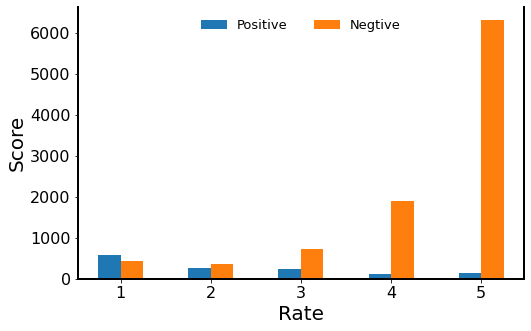

In [153]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.spines['top'].set_visible(False)
# 修改坐标轴粗细和字体大小
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# 构造x轴刻度标签、数据
labels = ['1', '2', '3', '4', '5']
# 两组数据
x = np.array([1,2,3,4,5]) # x轴刻度标签位置
width = 0.25 # 柱子的宽度
# 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
# x - width/2，x + width/2即每组数据在x轴上的位置
plt.bar(x - width/2, x1, width, label='Positive')
plt.bar(x + width/2, y1, width, label='Negtive')

ax.set_xlabel('Rate', fontsize=20)
ax.set_ylabel('Score', fontsize=20)
# 设置坐标轴刻度大小
ax.tick_params(labelsize=16)
ax.legend(fontsize=13, loc='upper center', frameon=False, ncol=3)

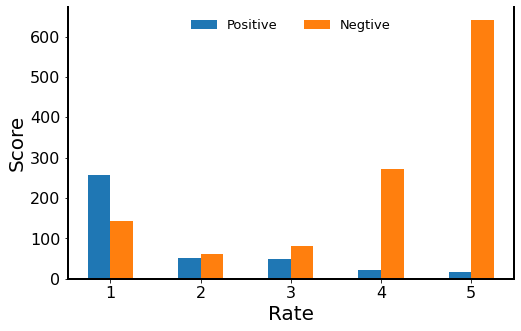

In [154]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.spines['top'].set_visible(False)
# 修改坐标轴粗细和字体大小
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# 构造x轴刻度标签、数据
labels = ['1', '2', '3', '4', '5']
# 两组数据
x = np.array([1,2,3,4,5]) # x轴刻度标签位置
width = 0.25 # 柱子的宽度
# 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
# x - width/2，x + width/2即每组数据在x轴上的位置
plt.bar(x - width/2, x2, width, label='Positive')
plt.bar(x + width/2, y2, width, label='Negtive')

ax.set_xlabel('Rate', fontsize=20)
ax.set_ylabel('Score', fontsize=20)
# 设置坐标轴刻度大小
ax.tick_params(labelsize=16)
ax.legend(fontsize=13, loc='upper center', frameon=False, ncol=3)

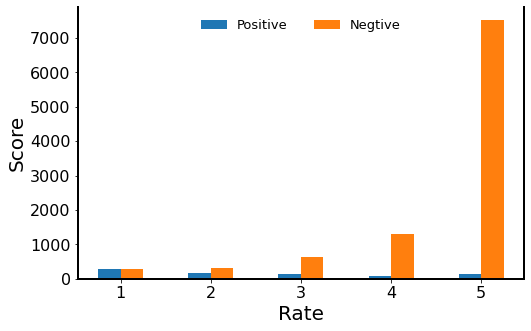

In [155]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.spines['top'].set_visible(False)
# 修改坐标轴粗细和字体大小
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# 构造x轴刻度标签、数据
labels = ['1', '2', '3', '4', '5']
# 两组数据
x = np.array([1,2,3,4,5]) # x轴刻度标签位置
width = 0.25 # 柱子的宽度
# 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
# x - width/2，x + width/2即每组数据在x轴上的位置
plt.bar(x - width/2, x3, width, label='Positive')
plt.bar(x + width/2, y3, width, label='Negtive')

ax.set_xlabel('Rate', fontsize=20)
ax.set_ylabel('Score', fontsize=20)
# 设置坐标轴刻度大小
ax.tick_params(labelsize=16)
ax.legend(fontsize=13, loc='upper center', frameon=False, ncol=3)

<AxesSubplot:>

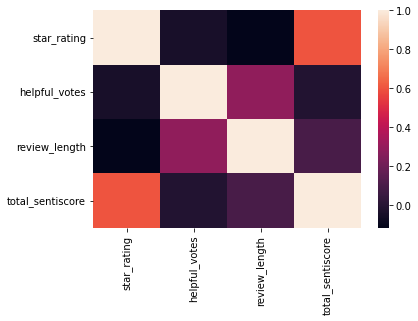

In [90]:
sns.heatmap(hair_dryer.loc[:,['star_rating','helpful_votes','review_length','total_sentiscore']].corr())

<AxesSubplot:>

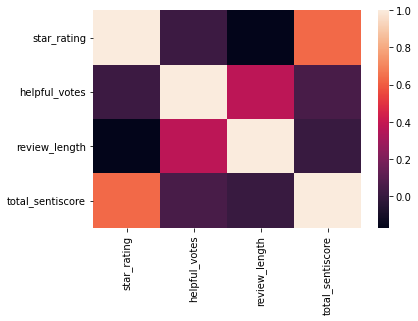

In [91]:
sns.heatmap(microwave.loc[:,['star_rating','helpful_votes','review_length','total_sentiscore']].corr())

<AxesSubplot:>

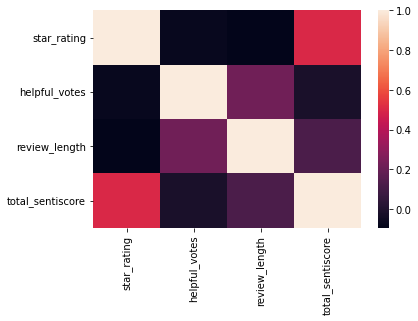

In [92]:
sns.heatmap(pacifier.loc[:,['star_rating','helpful_votes','review_length','total_sentiscore']].corr())

# 高频词

In [58]:
from nltk import FreqDist
from nltk.corpus import stopwords

stop_words = stopwords.words('english')


# function to remove stopwords
def remove_stopwords(rev):
    rev = rev.apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
    rev_new = rev.apply(
        lambda x: " ".join([w for w in x.split() if w not in stop_words]))
    rev_new = rev_new.apply(str.lower)
    return rev_new


def freq_words(x, terms=30):
    # 拆分所有单词
    all_words = ' '.join([text for text in x])
    all_words = all_words.split(' ')

    # 计算每个单词出现的频率
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({
        'word': list(fdist.keys()),
        'count': list(fdist.values())
    })

    # 选择排名前20的单词
    d = words_df.nlargest(columns="count", n=terms)
    return d


In [67]:
hair_dryer = pd.read_csv('hair_dryer.csv')
microwave = pd.read_csv('microwave.csv')
pacifier = pd.read_csv('pacifier.csv')

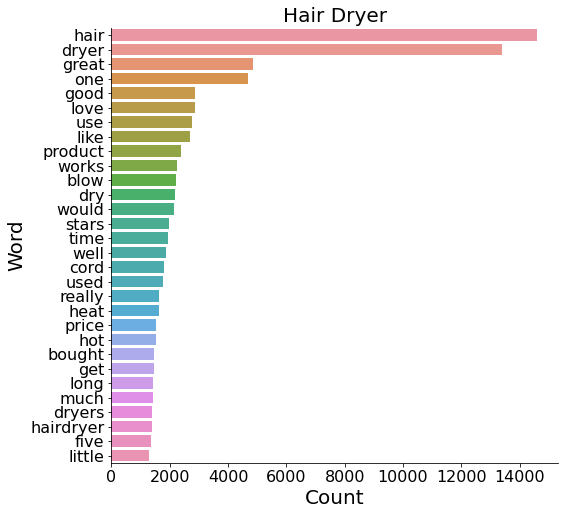

In [204]:
freq_hair_dryer = freq_words(remove_stopwords(hair_dryer['review']))
fig,ax = plt.subplots(figsize=(8,8))
ax = sns.barplot(data=freq_hair_dryer, x="count" , y = "word")
ax.tick_params(labelsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Count', fontsize=20)
ax.set_ylabel('Word', fontsize=20)
ax.set_title('Hair Dryer', fontsize=20)
plt.savefig('1.jpg',dpi=300)

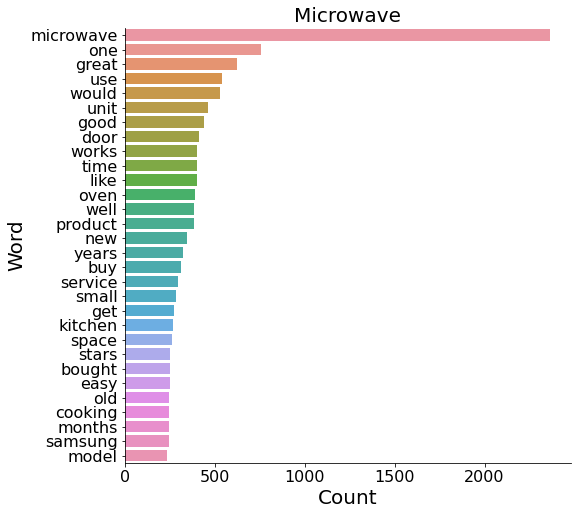

In [205]:
freq_microwave = freq_words(remove_stopwords(microwave['review']))
fig,ax = plt.subplots(figsize=(8,8))
ax = sns.barplot(data=freq_microwave, x="count" , y = "word")
ax.tick_params(labelsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Count', fontsize=20)
ax.set_ylabel('Word', fontsize=20)
ax.set_title('Microwave', fontsize=20)
plt.savefig('2.jpg',dpi=300)

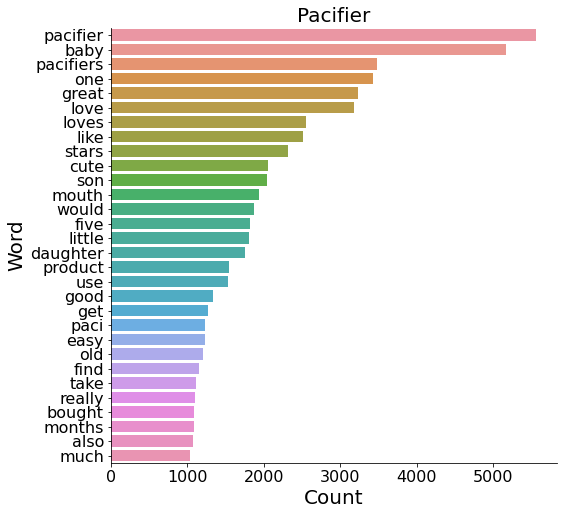

In [206]:
freq_pacifier = freq_words(remove_stopwords(pacifier['review']))
fig,ax = plt.subplots(figsize=(8,8))
ax = sns.barplot(data=freq_pacifier, x="count" , y = "word")
ax.tick_params(labelsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Count', fontsize=20)
ax.set_ylabel('Word', fontsize=20)
ax.set_title('Pacifier', fontsize=20)
plt.savefig('3.jpg',dpi=300)